<a href="https://colab.research.google.com/github/lisimisa-byte/sollma-fin/blob/main/SollmaFin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Исследование результатов А/В-теста и поиск инсайтов

SollmaFin — международное мобильное приложение для онлайн-торговли финансовыми активами. Пользователи могут инвестировать деньги в акции, валюту, криптовалюту, биржевые фонды (ETF) и другие активы. Целевая аудитория приложения — начинающие инвесторы. Получить доступ к финансовым рынкам можно со смартфона либо через веб-версию.

Приложение ориентировано на рынок Латинской Америки с акцентом на четыре страны: Мексику, Бразилию, Колумбию и Аргентину — там быстро растёт интерес к финтеху и инвестициям, а экономики очень разные.

Появилась гипотеза о недостаточной финансовой грамотности пользователей: они не понимают, как работать с активами разной степени риска. Клиенты покупают активы с высоким риском и теряют деньги, что снижает вовлечённость.
Команда продукта решила обновить онбординг пользователей и добавить в него детальную информацию о различиях финансовых активов и связанных с ними рисках. Однако появилось опасение, что углублённый онбординг отпугнёт клиентов от пополнения депозита и более рискованных вложений.

Решено провести A/B-эксперимент.

### А/В-эксперимент

В эксперименте участвовали новые пользователи, которые зарегистрировались в приложении со 2 по 15 июня 2025 года.
Пользователей случайным образом разделили на две равные группы:
- Контрольная группа проходила стандартный онбординг без обязательного обучения.
- Тестовая группа проходила обновлённый онбординг с подробной информацией об активах и связанных с ними рисках.

После разделения активность пользователей анализировали в течение недели.

Цель эксперимента — оценить, как обновлённый онбординг влияет на поведение пользователей и их дальнейшую инвестиционную активность.

При внедрении новой фичи выдвинуты такие гипотезы:
- Гипотеза роста: обучающий онбординг помогает пользователям лучше понимать принципы инвестирования, поэтому они будут чаще открывать второй депозит.
- Гипотеза риска: информация о возможных потерях и высоких рисках отпугнёт некоторых новичков, особенно самых осторожных, что снизит конверсию в первый депозит.
- Дополнительная гипотеза: после нового онбординга пользователи, которые выбрали высокорискованные активы, будут чаще, чем раньше, возвращаться и открывать второй депозит. При старом онбординге пользователи часто покупали активы с высоким риском без понимания последствий. Это приводило к потерям и оттоку после первого депозита.

Набор метрик:
- Ключевая метрика — средняя сумма всех депозитов на одного пользователя (включая тех, кто установил приложение или открыл веб-версию).
- Барьерная метрика — конверсия из регистрации в первый депозит.
- Вспомогательная метрика 1 — конверсия из первого депозита во второй.
- Вспомогательная метрика 2 — средняя сумма всех депозитов на пользователя, который открыл хотя бы один депозит.

Ожидалось, что ключевая и барьерная метрики не упадут, а вспомогательные покажут значительный рост.

### Задачи аналитика   


#### 1. Анализ исторических данных

- Поведение новых пользователей, в том числе динамика привлечения, сегментация и ключевые этапы воронки действий.
- Метрики, связанные с внесением депозитов, в том числе средние суммы депозитов.

#### 2. Анализ данных А/В-теста

Изучение результатов эксперимента будет состоять из двух этапов:
- Сравнение поведения пользователей в контрольной и тестовой группах, оценка статистической значимости изменений.
- Исследование влияния нового онбординга на поведение платящих пользователей.


### Данные  

1. Датасет `/datasets/pa_sollmafin_hist.csv` содержит исторические данные о ключевых действиях новых пользователей, привлечённых в период с 1 апреля по 1 июня 2025 года включительно. В датасете собраны действия пользователей до оформления второго депозита.
2. Датасет `/datasets/pa_sollmafin_abt.csv` содержит данные А/В-эксперимента — все действия новых пользователей, которые зарегистрировались со 2 по 15 июня 2025 года включительно. Данные собраны в рамках проверки гипотезы о влиянии нового онбординга на поведение и активность пользователей. Пользователи уже распределены по группам А/В-эксперимента.

Общие поля датасетов:
- `user_id` — уникальный идентификатор пользователя;
- `country_code` — код страны пользователя в формате ISO (например, `BR` — Бразилия, `MX` — Мексика, `AR` — Аргентина, `CO` — Колумбия);
- `platform` — устройство, с которого пользователь взаимодействует с продуктом: mobile или web;
- `first_ts` — время первого появления пользователя в системе;
- `first_dt` — дата первого появления пользователя (без времени);
- `event_ts` — время события;
- `event_name` — название события;
- `amount` — сумма пополнения депозита;
- `asset` — тип приобретённого актива;
- `risk_level` — уровень риска актива: low — низкий риск, medium — средний риск, high — высокий риск.

В датасете `/datasets/pa_sollmafin_abt.csv` содержатся два дополнительных поля:
- `ab_test` — название А/В-эксперимента;
- `group` — пользовательская группа А/В-эксперимента.


### План проекта
1. Загрузка исторических данных и их предобработка
2. Исследовательский анализ исторических данных
3. Исследование результатов А/В эксперимента
4. Анализ изменений суммы депозитов на платящего пользователя
5. Выводы

---

## Часть 1

### 1. Загрузка исторических данных и их предобработка

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor':'.9', 'grid.color':'white'})

In [ ]:
hist = pd.read_csv('https://code.s3.yandex.net/datasets/pa_sollmafin_hist.csv')

In [ ]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238059 entries, 0 to 238058
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       238059 non-null  object 
 1   country_code  238059 non-null  object 
 2   platform      238059 non-null  object 
 3   first_ts      238059 non-null  object 
 4   first_dt      238059 non-null  object 
 5   event_ts      238059 non-null  object 
 6   event_name    238059 non-null  object 
 7   amount        33093 non-null   float64
 8   asset         15392 non-null   object 
 9   risk_level    15392 non-null   object 
dtypes: float64(1), object(9)
memory usage: 18.2+ MB


In [ ]:
hist['event_name'].unique()

array(['install / open_web', 'introduction', 'registration', 'main_page',
       'onboarding_complete', 'first_deposit', 'asset_purchase',
       'second_deposit'], dtype=object)

Наблюдаемые пропуски в данных связаны с тем, что не все действия связаны с транзакциями (amount)

In [ ]:
hist['platform'].unique()

array(['mobile', 'web'], dtype=object)

In [ ]:
hist['country_code'].unique()

array(['BR', 'AR', 'CO', 'MX'], dtype=object)

In [ ]:
hist.duplicated().sum()

0

Дубликаты не обнаружены.

In [ ]:
hist.first_ts, hist.event_ts, hist.first_dt = pd.to_datetime(hist.first_ts), pd.to_datetime(hist.event_ts), pd.to_datetime(hist.first_dt).dt.date

In [ ]:
print(f'Данные представлены за период с {hist.event_ts.dt.date.min()} по {hist.event_ts.dt.date.max()}')

Данные представлены за период с 2025-04-01 по 2025-06-09


В данные могли попасть события, связанные с тестом.

In [ ]:
hist = hist[hist['event_ts'] < '2025-06-02']

In [ ]:
hist[hist['event_ts'] < hist['first_ts']].shape[0]

0

In [ ]:
hist.head()

,user_id,country_code,platform,first_ts,first_dt,event_ts,event_name,amount,asset,risk_level
0,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 19:55:51,install / open_web,NaN,NaN,NaN
1,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 19:55:59,introduction,NaN,NaN,NaN
2,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 23:46:06,registration,NaN,NaN,NaN
3,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 23:46:15,main_page,NaN,NaN,NaN
4,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 23:47:59,onboarding_complete,NaN,NaN,NaN


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Диаграмма распределения amount')

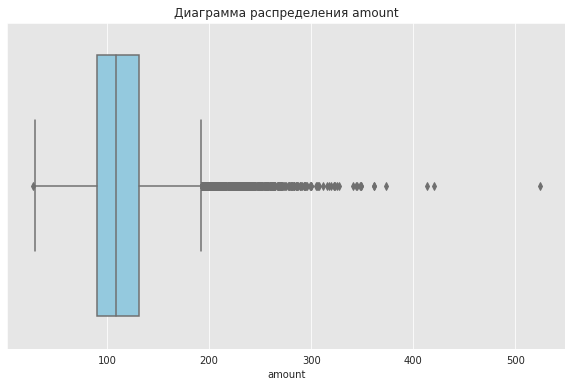

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(hist['amount'], color='skyblue')

plt.title('Диаграмма распределения amount')

Присутствуют выбросы, однако в исследовательском анализе нет необходимости их убирать.

---

### 2. Исследовательский анализ исторических данных

Анализ новых пользователей. Динамика привлечения новых пользователей в приложение.

In [ ]:
users_per_day = hist.groupby('first_dt')['user_id'].nunique().reset_index()
users_per_day['ma_7'] = users_per_day['user_id'].rolling(window=7, center=True).mean()

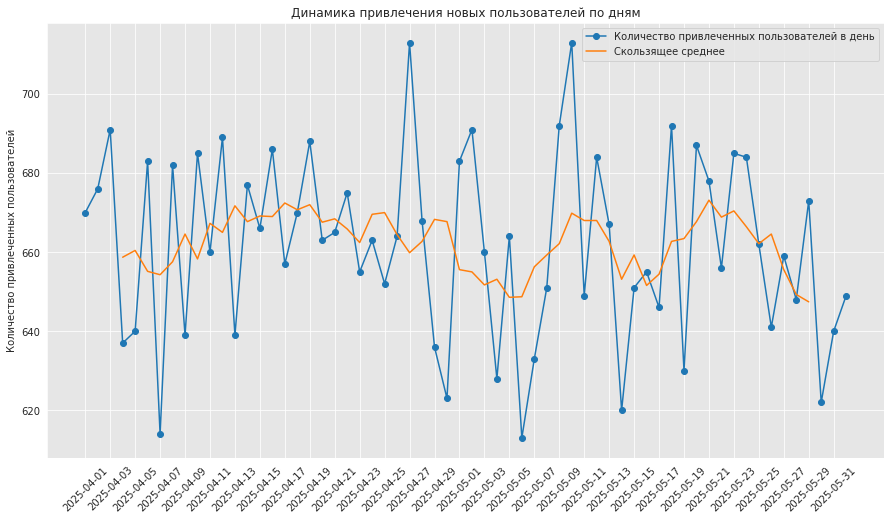

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot(users_per_day.first_dt, users_per_day.user_id, marker='o', label='Количество привлеченных пользователей в день')
plt.plot(users_per_day.first_dt, users_per_day.ma_7, label='Скользящее среднее')
xticks = plt.xticks(rotation=45, ticks=[x for x in users_per_day.first_dt[::2]])

plt.ylabel('Количество привлеченных пользователей')
plt.title('Динамика привлечения новых пользователей по дням')
plt.legend()

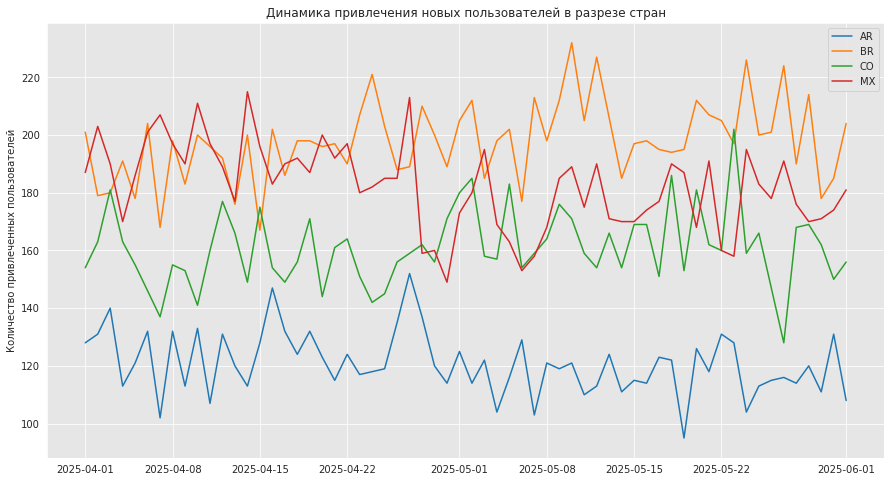

In [ ]:
users_per_day_country = hist.groupby(['first_dt', 'country_code'])['user_id'].nunique().reset_index()
users_per_day_country.first_dt = pd.to_datetime(users_per_day_country.first_dt)

plt.figure(figsize=(15, 8))

for country in users_per_day_country.country_code.unique():
  plot_data = users_per_day_country[users_per_day_country['country_code'] == country]
  plt.plot(plot_data.first_dt, plot_data.user_id, label=country)

plt.ylabel('Количество привлеченных пользователей')
plt.title('Динамика привлечения новых пользователей в разрезе стран')
plt.legend()

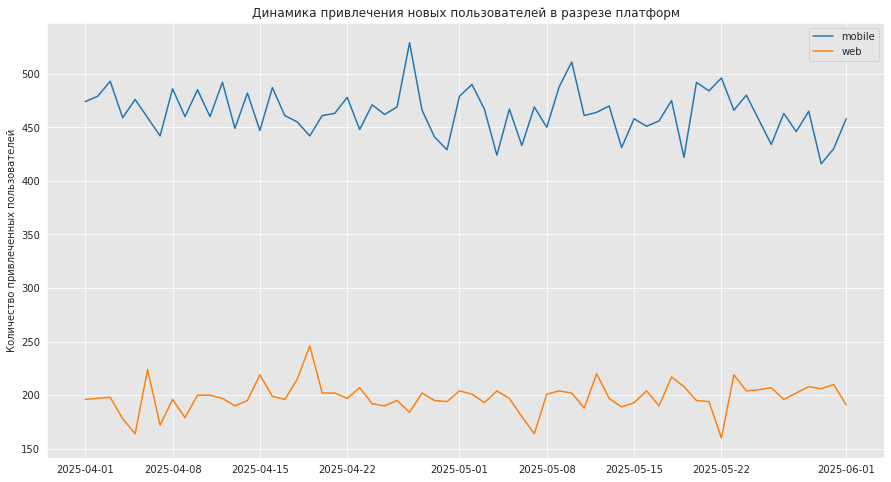

In [ ]:
users_per_day_platform = hist.groupby(['first_dt', 'platform'])['user_id'].nunique().reset_index()
users_per_day_platform.first_dt = pd.to_datetime(users_per_day_platform.first_dt)

plt.figure(figsize=(15, 8))

for platform in users_per_day_platform.platform.unique():
  plot_data = users_per_day_platform[users_per_day_platform['platform'] == platform]
  plt.plot(plot_data.first_dt, plot_data.user_id, label=platform)

plt.ylabel('Количество привлеченных пользователей')
plt.title('Динамика привлечения новых пользователей в разрезе платформ')
plt.legend()

Динамика привлечения новых пользователей в целом не ухудшается.

Больше всего пользователей привлекается из Мексики и Бразилии, показатели Аргентины значительно ниже, чем в других странах.

Новых пользователей в мобильной версии приложения белее чем в два раза больше, чем в десктопной, но это является современной нормой.

Анализ воронок событий.



In [ ]:
steps = ['install / open_web', 'introduction', 'registration', 'main_page', 'onboarding_complete', 'first_deposit', 'asset_purchase', 'second_deposit']
funnel_steps = hist[hist['event_name'].isin(steps)]
funnel_counts =  funnel_steps.groupby('event_name')['user_id'].nunique().reindex(steps)

funnel_df = pd.DataFrame({
   'step': steps,
   'users': funnel_counts.values
})

funnel_df['conversion_from_first_%'] = round(funnel_df['users'] / funnel_df['users'].iloc[0] * 100, 1)
funnel_df['dif_from_first_%'] = funnel_df['conversion_from_first_%'] - funnel_df['conversion_from_first_%'].shift(1)
funnel_df['conversion_from_previous_%'] = round(funnel_df['users'] / funnel_df['users'].shift(1) * 100, 1)
funnel_df['dif_from_previous_%'] = funnel_df['conversion_from_previous_%'] - 100
funnel_df


,step,users,conversion_from_first_%,dif_from_first_%,conversion_from_previous_%,dif_from_previous_%
0,install / open_web,41032,100.0,NaN,NaN,NaN
1,introduction,41032,100.0,0.0,100.0,0.0
2,registration,37913,92.4,-7.6,92.4,-7.6
3,main_page,34841,84.9,-7.5,91.9,-8.1
4,onboarding_complete,34138,83.2,-1.7,98.0,-2.0
5,first_deposit,27025,65.9,-17.3,79.2,-20.8
6,asset_purchase,14777,36.0,-29.9,54.7,-45.3
7,second_deposit,4979,12.1,-23.9,33.7,-66.3


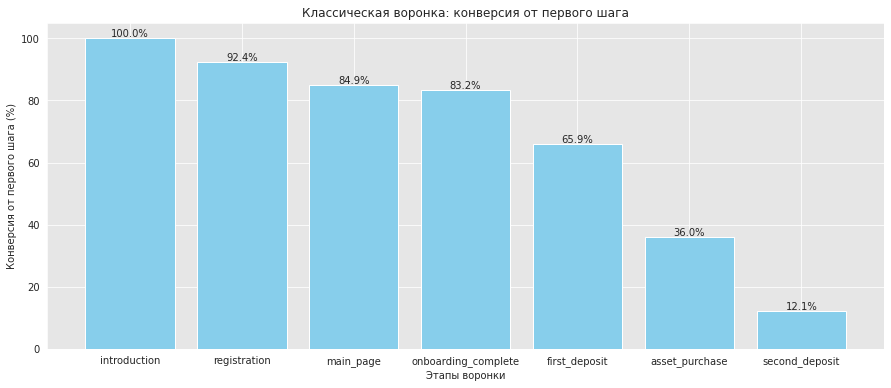

In [ ]:
plt.figure(figsize=(15, 6))

plot_data = funnel_df[funnel_df['step'] != 'install / open_web']
plt.bar(
    plot_data['step'],
    plot_data['conversion_from_first_%'],
    color='skyblue')

for i, v in enumerate(plot_data['conversion_from_first_%']):
    plt.text(i, v + 0.5, f'{v}%', ha='center')

plt.title('Классическая воронка: конверсия от первого шага')
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

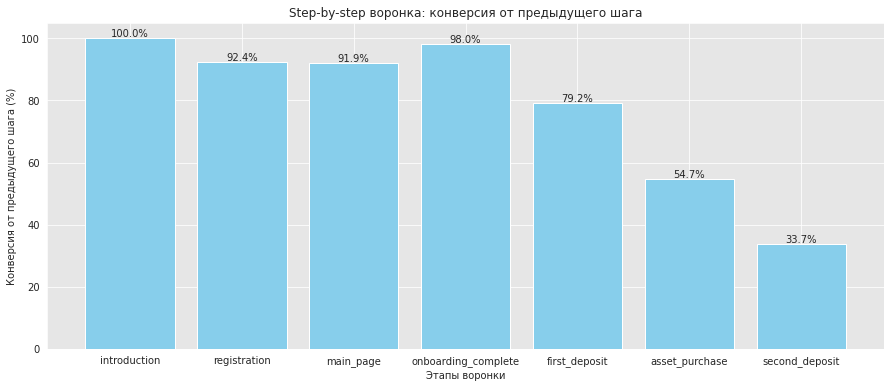

In [ ]:
plt.figure(figsize=(15, 6))

plot_data = funnel_df[funnel_df['step'] != 'install / open_web']
plt.bar(
    plot_data['step'],
    plot_data['conversion_from_previous_%'],
    color='skyblue')

for i, v in enumerate(plot_data['conversion_from_previous_%']):
    plt.text(i, v + 0.5, f'{v}%', ha='center')

plt.title('Step-by-step воронка: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

Классическая и пошаговая воронки показывают, что наибольшее количество пользователей "теряется" при переходе ко второму пополнению депозита, при том что конверсия в первый депозит хорошая. На этом шаге отсеивается 29.9% всех пользователей или 45.3% тех, кто купил актив.

In [ ]:
# Строим классическую и step_by_step воронку

# Задаем порядок шагов в воронке

df = hist.copy()

funnel_steps = ['install / open_web', 'introduction', 'registration', 'main_page', 'onboarding_complete', 'first_deposit', 'asset_purchase', 'second_deposit']

# Фильтруем датасет оставляя только нужные шаги воронки
funnel_df_steps = df[df['event_name'].isin(funnel_steps)]

# Считаем число уникальных пользователей на каждом шаге
funnel_counts = funnel_df_steps.groupby('event_name')['user_id'].nunique().reindex(funnel_steps)

# Собираем датафрейм
funnel_df = pd.DataFrame({'step': funnel_steps, 'users': funnel_counts.values})

# Добавляем конверсии и округляем до 1 знака после запятой
funnel_df['conversion_from_first_%'] = (funnel_df['users'] / funnel_df['users'].iloc[0] * 100).round(1)
funnel_df['conversion_from_previous_%'] = (funnel_df['users'] / funnel_df['users'].shift(1) * 100).round(1)

funnel_df


,step,users,conversion_from_first_%,conversion_from_previous_%
0,install / open_web,41032,100.0,NaN
1,introduction,41032,100.0,100.0
2,registration,37913,92.4,92.4
3,main_page,34841,84.9,91.9
4,onboarding_complete,34138,83.2,98.0
5,first_deposit,27025,65.9,79.2
6,asset_purchase,14777,36.0,54.7
7,second_deposit,4979,12.1,33.7


Влияние уровня риска актива на открытие второго депозита.


In [ ]:
sorted_data = hist.sort_values(['user_id', 'event_ts'])

In [ ]:
sorted_data['first_asset_risk'] = sorted_data.groupby('user_id')['risk_level'].transform('first')

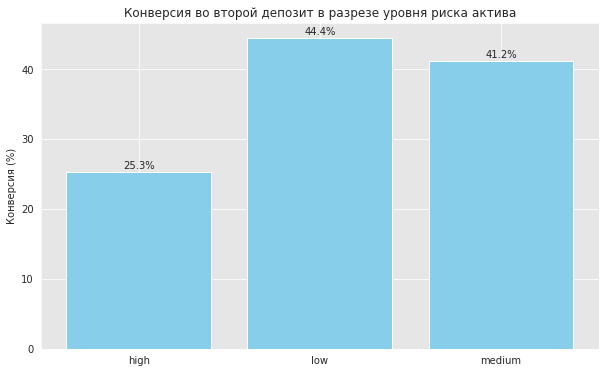

In [ ]:
funnel_by_risk = sorted_data.groupby(['event_name', 'first_asset_risk'])['user_id'].nunique().reset_index()
funnel_by_risk = funnel_by_risk[funnel_by_risk['event_name'].isin(['first_deposit', 'second_deposit'])]

pivot_data = funnel_by_risk.pivot(index='first_asset_risk', columns='event_name', values='user_id')

pivot_data['conversion_%'] = round(pivot_data['second_deposit'] / pivot_data['first_deposit'] * 100, 1)

plt.figure(figsize=(10, 6))
plt.bar(pivot_data.index, pivot_data['conversion_%'], color='skyblue')

for i, v in enumerate(pivot_data['conversion_%']):
    plt.text(i, v + 0.5, f'{v}%', ha='center')

plt.title('Конверсия во второй депозит в разрезе уровня риска актива')
plt.ylabel('Конверсия (%)')
plt.show()

Как и предполагалось, самая низкая конверсия по второй депозит у тех, кто преобрел первый актив с высоким уровнем риска. Такие пользователи часто теряли деньги и их это отпугивало.

Самая высокая конверсия у пользователей с низкорискованными активами, но разница со среднерискованными не слишком велика (3%).

In [ ]:
# Уберем нулевые значения, чтобы посмотреть именно распределение сумм депозитов
amount_per_user = hist[
    hist['event_name'].isin(['first_deposit', 'second_deposit'])
    ].groupby('user_id')['amount'].sum().reset_index()

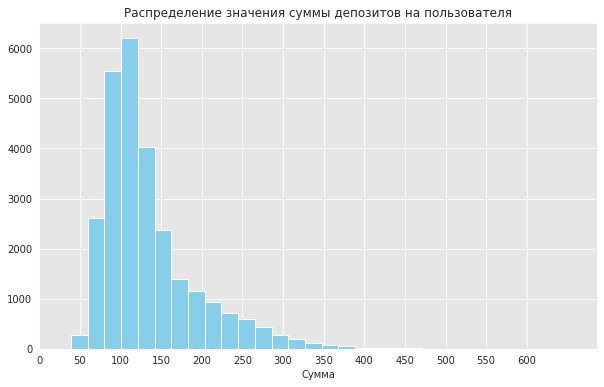

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(amount_per_user['amount'], bins=30, color='skyblue')

xticks = plt.xticks(ticks=[x for x in range(0, 650, 50)])

plt.title('Распределение значения суммы депозитов на пользователя')
plt.xlabel('Сумма')
plt.show()

In [ ]:
print('Средняя сумма всех депозитов на пользователя:', round(hist.groupby('user_id')['amount'].sum().mean(), 2), '\nСтандартное отклоение:', round(hist.groupby('user_id')['amount'].sum().std(), 2)) # Оставляем нулевые значения, чтобы учесть в метрике пользователей, которые не совершали покупок

Средняя сумма всех депозитов на пользователя: 88.47 
Стандартное отклоение: 79.64


Наибольшее количество пользователей вносят на депозиты суммарно 90-140.

Среднее значения на пользователя c учетом всех пользователей - 88.47.

Стандартное отклонение 79.64 показывает довольно большой разброс значений в данных.

---

## Часть 2

### 3. Исследование результатов А/В эксперимента



In [ ]:
abt = pd.read_csv('https://code.s3.yandex.net/datasets/pa_sollmafin_abt.csv')

In [ ]:
abt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54805 entries, 0 to 54804
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       54805 non-null  object 
 1   country_code  54805 non-null  object 
 2   platform      54805 non-null  object 
 3   first_ts      54805 non-null  object 
 4   first_dt      54805 non-null  object 
 5   event_ts      54805 non-null  object 
 6   event_name    54805 non-null  object 
 7   ab_test       54805 non-null  object 
 8   group         54805 non-null  object 
 9   amount        7843 non-null   float64
 10  asset         3750 non-null   object 
 11  risk_level    3750 non-null   object 
dtypes: float64(1), object(11)
memory usage: 5.0+ MB


Неожиданных пропусков в данных не обнаружено.

In [ ]:
abt.duplicated().sum()

0

In [ ]:
abt.columns

Index(['user_id', 'country_code', 'platform', 'first_ts', 'first_dt',
       'event_ts', 'event_name', 'ab_test', 'group', 'amount', 'asset',
       'risk_level'],
      dtype='object')

In [ ]:
abt.duplicated(subset=['user_id', 'country_code', 'platform', 'first_ts', 'first_dt',
       'event_ts', 'event_name', 'amount', 'asset',
       'risk_level']).sum()

0

Явные и неявные дубликаты не обнаружены.

In [ ]:
abt.first_ts, abt.event_ts, abt.first_dt = pd.to_datetime(abt.first_ts), pd.to_datetime(abt.event_ts), pd.to_datetime(abt.first_dt).dt.date

In [ ]:
print(f'Данные представлены за период с {abt.event_ts.dt.date.min()} по {abt.event_ts.dt.date.max()}')

Данные представлены за период с 2025-06-02 по 2025-06-22


Судя по всему, тест проводился более длительное время, чем планировалось, однако логике эксперимента это не вредит и дает больше данных для аналитики. Фильтровать нет необходимости.

In [ ]:
abt.head()

,user_id,country_code,platform,first_ts,first_dt,event_ts,event_name,ab_test,group,amount,asset,risk_level
0,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-07 19:55:51,install / open_web,onboarding_test,test,NaN,NaN,NaN
1,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-07 19:55:54,introduction,onboarding_test,test,NaN,NaN,NaN
2,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-08 06:18:09,registration,onboarding_test,test,NaN,NaN,NaN
3,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-08 06:18:13,main_page,onboarding_test,test,NaN,NaN,NaN
4,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-08 06:33:40,onboarding_complete,onboarding_test,test,NaN,NaN,NaN


In [ ]:
abt.ab_test.unique()

array(['onboarding_test'], dtype=object)

Данные соответствуют ожидаемым.

Данных о других тестах в таблице не представлено.


Анализ аудитории эксперимента.

In [ ]:
flawed_users = abt.groupby('user_id')['group'].nunique().reset_index()
flawed_users = flawed_users[flawed_users['group'] > 1]
flawed_users.shape[0]

0

Пользователи, попавшие сразу в две тестовые группы, отсутствуют.

In [ ]:
group_count = abt.groupby('group')['user_id'].nunique()
group_count

group
control    4847
test       4568
Name: user_id, dtype: int64

Количество пользователей в группах сопоставимо, однако в контрольную группу попало немного больше пользователей. Стоит проверить, сопоставимы ли группы по соотношению стран и платформ.

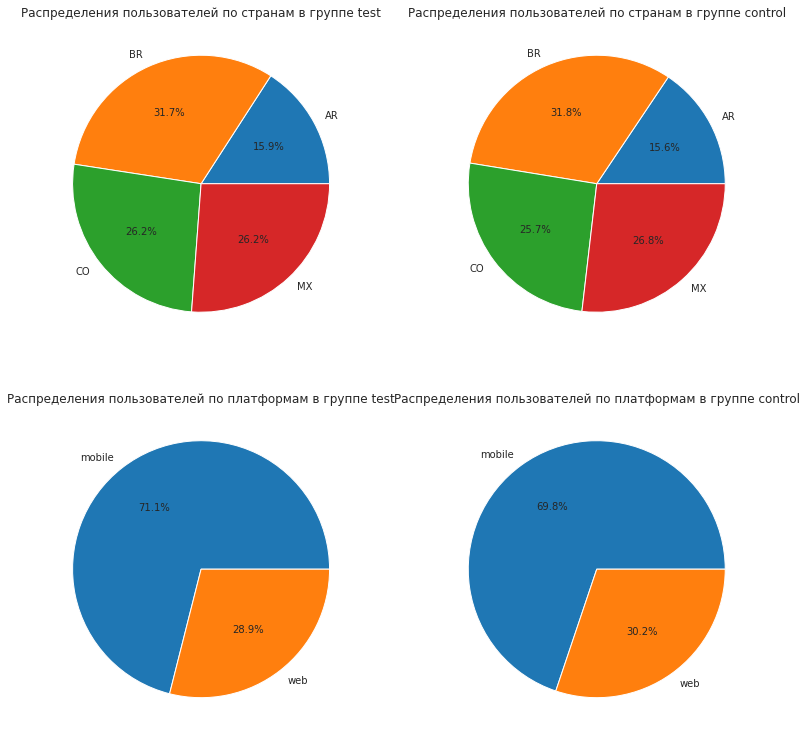

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(13, 13))

for ax, group in zip([axes[0, 0], axes[0, 1]], abt.group.unique()):
  plot_data = abt[abt['group'] == group]
  plot_data = plot_data.groupby('country_code')['user_id'].nunique().reset_index()
  ax.pie(
      plot_data.user_id,
      labels=plot_data['country_code'].unique(),
      autopct='%1.1f%%'
  )
  ax.set_title(f'Распределения пользователей по странам в группе {group}')

for ax, group in zip([axes[1, 0], axes[1, 1]], abt.group.unique()):
  plot_data = abt[abt['group'] == group]
  plot_data = plot_data.groupby('platform')['user_id'].nunique().reset_index()
  ax.pie(
      plot_data.user_id,
      labels=plot_data['platform'].unique(),
      autopct='%1.1f%%'
  )
  ax.set_title(f'Распределения пользователей по платформам в группе {group}')

plt.show()

Доля пользователей в тестовой и контрольной группах не различается.

      H0​:pA​=pB​
Доля пользователей в группе контроля больше, чем в группе теста.

      H1​:pA​>pB​


In [ ]:
alpha = 0.05

stat_ztest, p_value_ztest = proportions_ztest(
      [group_count.iloc[0], group_count.iloc[1]],
      [group_count.iloc[0] + group_count.iloc[1], group_count.iloc[0] + group_count.iloc[1]],
      alternative='larger' # так как известно, что в контрольную группу попало больше пользователей
)

if p_value_ztest > alpha:
      print(f'pvalue={p_value_ztest} > {alpha}')
      print('Количественная разница между группами не является статистически значимой')
else:
      print(f'pvalue={p_value_ztest} < {alpha}')
      print('Количественная разница между группами является статистически значимой', stat_ztest)

pvalue=2.387349340292104e-05 < 0.05
Количественная разница между группами является статистически значимой 4.066390095909187


Распределение по странам и платформам одинаково в контрольной и тестовой группах.

Хотя контрольная группа оказалась больше и статистический тест показал значимую разницу между вероятностями пользователей попасть в ту или иную группу, группы практически идентичны по составу, поэтому небольшой количественной разницей можно пренебречь.

Пользователи распределены по группам корректно, можно проводить эксперимент.

**Задача 3.2.** Сравнение воронок событий.
- Сравните пользовательский путь новых пользователей в тестовой и контрольной группах.
- Постройте классическую и последовательную воронки, выполните визуализацию и сделайте промежуточный вывод.

In [ ]:
funnel_df_control = pd.DataFrame()
funnel_df_test = pd.DataFrame()

for group in ['control', 'test']:
  group_data = abt[abt['group'] == group]
  funnel_steps = group_data[group_data['event_name'].isin(steps)]
  funnel_counts =  funnel_steps.groupby('event_name')['user_id'].nunique().reindex(steps)

  df_name = pd.DataFrame({
    'step': steps,
    'users': funnel_counts.values
  })

  df_name['conversion_from_first_%'] = round(df_name['users'] / df_name['users'].iloc[0] * 100, 1)
  df_name['dif_from_first_%'] = df_name['conversion_from_first_%'] - df_name['conversion_from_first_%'].shift(1)
  df_name['conversion_from_previous_%'] = round(df_name['users'] / df_name['users'].shift(1) * 100, 1)
  df_name['dif_from_previous_%'] = df_name['conversion_from_previous_%'] - 100

  if group == 'control':
        funnel_df_control = df_name
  else:
        funnel_df_test = df_name

In [ ]:
funnel_df_control

,step,users,conversion_from_first_%,dif_from_first_%,conversion_from_previous_%,dif_from_previous_%
0,install / open_web,4847,100.0,NaN,NaN,NaN
1,introduction,4847,100.0,0.0,100.0,0.0
2,registration,4512,93.1,-6.9,93.1,-6.9
3,main_page,4161,85.8,-7.3,92.2,-7.8
4,onboarding_complete,4063,83.8,-2.0,97.6,-2.4
5,first_deposit,3228,66.6,-17.2,79.4,-20.6
6,asset_purchase,1773,36.6,-30.0,54.9,-45.1
7,second_deposit,654,13.5,-23.1,36.9,-63.1


In [ ]:
funnel_df_test

,step,users,conversion_from_first_%,dif_from_first_%,conversion_from_previous_%,dif_from_previous_%
0,install / open_web,4568,100.0,NaN,NaN,NaN
1,introduction,4568,100.0,0.0,100.0,0.0
2,registration,4265,93.4,-6.6,93.4,-6.6
3,main_page,3919,85.8,-7.6,91.9,-8.1
4,onboarding_complete,3462,75.8,-10.0,88.3,-11.7
5,first_deposit,2987,65.4,-10.4,86.3,-13.7
6,asset_purchase,1977,43.3,-22.1,66.2,-33.8
7,second_deposit,974,21.3,-22.0,49.3,-50.7


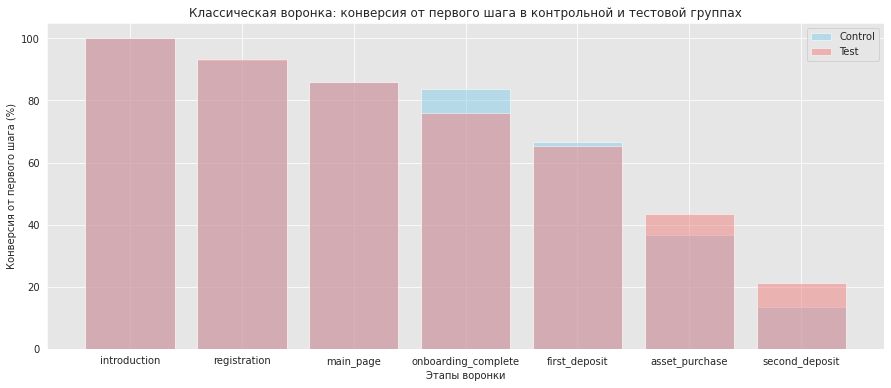

In [ ]:
plt.figure(figsize=(15, 6))

groups = ['Control', 'Test']
colors = ['skyblue', 'lightcoral']

for df, group, color in zip([funnel_df_control, funnel_df_test], groups, colors):

  plot_data = df[df['step'] != 'install / open_web']
  plt.bar(
      plot_data['step'],
      plot_data['conversion_from_first_%'],
      alpha= 0.5,
      label=group,
      color=color)

plt.title('Классическая воронка: конверсия от первого шага в контрольной и тестовой группах')
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.legend()
plt.show()

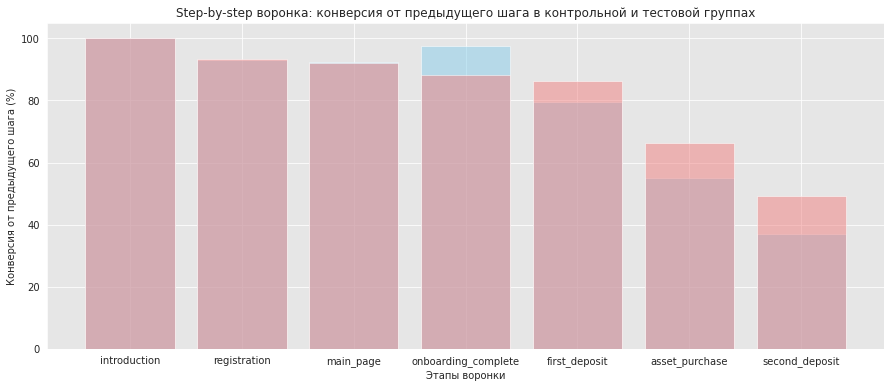

In [ ]:
plt.figure(figsize=(15, 6))

for df, group, color in zip([funnel_df_control, funnel_df_test], groups, colors):

  plot_data = df[df['step'] != 'install / open_web']
  plt.bar(
      plot_data['step'],
      plot_data['conversion_from_previous_%'],
      alpha= 0.5,
      label=group,
      color=color)

plt.title('Step-by-step воронка: конверсия от предыдущего шага в контрольной и тестовой группах')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

Пользователи контрольной группы чаще завершают онбординг, а так же у этой группы немного лучше конверсия из регистрации в первый депозит.

Тестовая группа показывает лучшую по сравнению с контрольной группой конверсию во второй депозит: на 7.8% больше из первого шага, на 12.4% больше из предыдущего шага.

Влияние новой фичи на конверсию во второй депозит с учётом уровня риска купленного актива.
- Проанализирукм, как категория риска купленного актива влияет на вероятность открытия второго депозита в тестовой и контрольной группах.
- Сравним результаты и оценим, есть ли статистически значимая разница между группами.

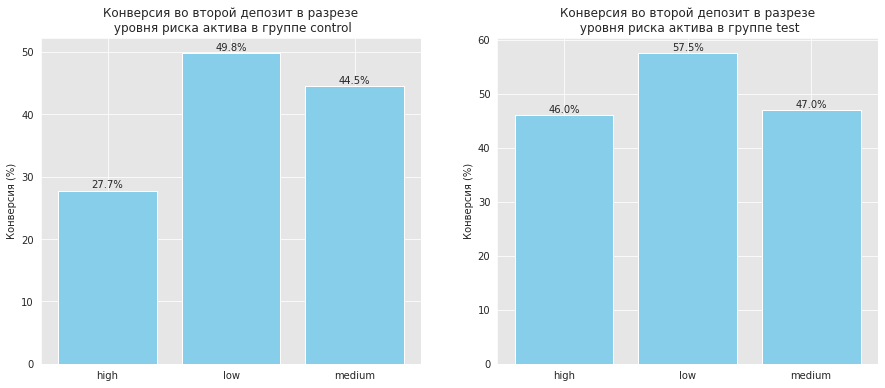

In [ ]:
sorted_data = abt.sort_values(['user_id', 'event_ts'])
sorted_data['first_asset_risk'] = sorted_data.groupby('user_id')['risk_level'].transform('first')

n = [] # размер группы
m = [] # количество успехов

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

for group, ax in zip(['control', 'test'], (ax1, ax2)):
  funnel_by_risk = sorted_data[sorted_data['group'] == group]
  funnel_by_risk = funnel_by_risk.groupby(['event_name', 'first_asset_risk'])['user_id'].nunique().reset_index()
  funnel_by_risk = funnel_by_risk[funnel_by_risk['event_name'].isin(['first_deposit', 'second_deposit'])]

  pivot_data = funnel_by_risk.pivot(index='first_asset_risk', columns='event_name', values='user_id')

  pivot_data['conversion_%'] = round(pivot_data['second_deposit'] / pivot_data['first_deposit'] * 100, 1)

  n.append(pivot_data['first_deposit'])
  m.append(pivot_data['second_deposit'])

  ax.bar(pivot_data.index, pivot_data['conversion_%'], color='skyblue')

  for i, v in enumerate(pivot_data['conversion_%']):
      ax.text(i, v + 0.5, f'{v}%', ha='center')

  ax.set_title(f'Конверсия во второй депозит в разрезе\n уровня риска актива в группе {group}')
  ax.set_ylabel('Конверсия (%)')

plt.show()

Видно улучшение конверсии в тестовой группе во всех категориях риска. Особенно заметна разница в высокорискованных активах: конверсия выросла почти в два раза.

In [ ]:
results = {}
for list_name, data_list in zip(['n', 'm'], [n, m]):
  for i, group in zip([0, 1], ['a', 'b']):
    for level in ['low', 'medium', 'high']:
      var_name = f"{level}_{list_name}_{group}"
      value = data_list[i].get(level, 0)
      results[var_name] = value


In [ ]:
alpha = 0.05

for level in ['low', 'medium', 'high']:
  stat_ztest, p_value_ztest = proportions_ztest(
      [results.get(f'{level}_m_a', 0), results.get(f'{level}_m_b', 0)],
      [results.get(f'{level}_n_a', 0), results.get(f'{level}_n_b', 0)],
      alternative='smaller'
  )

  print(f'\n Конверсия во второй депозит в категории {level} в тестовой и контрольной группах не различается.\n    H0​:pA​=pB​\n Конверсия в группе теста выше, чем в группе контроля.\n    H1​:pA​>pB​\n')

  if p_value_ztest > alpha:
      print(f'pvalue={p_value_ztest} > {alpha}')
      print(f'Увеличение конверсии в категории {level} не является статистически значимым')
  else:
      print(f'pvalue={p_value_ztest} < {alpha}')
      print(f'Увеличение конверсии в категории {level} статистически значимо', stat_ztest)


 Конверсия во второй депозит в категории low в тестовой и контрольной группах не различается.
    H0​:pA​=pB​
 Конверсия в группе теста выше, чем в группе контроля.
    H1​:pA​>pB​

pvalue=0.019536095218929204 < 0.05
Увеличение конверсии в категории low статистически значимо -2.063425803768753

 Конверсия во второй депозит в категории medium в тестовой и контрольной группах не различается.
    H0​:pA​=pB​
 Конверсия в группе теста выше, чем в группе контроля.
    H1​:pA​>pB​

pvalue=0.18034523696923505 > 0.05
Увеличение конверсии в категории medium не является статистически значимым

 Конверсия во второй депозит в категории high в тестовой и контрольной группах не различается.
    H0​:pA​=pB​
 Конверсия в группе теста выше, чем в группе контроля.
    H1​:pA​>pB​

pvalue=8.022633974380208e-15 < 0.05
Увеличение конверсии в категории high статистически значимо -7.6789061870186375


По результатам z-теста пропорций увеличение конверсии во второй депозит в тестовой группе является статистически значимым для категорий риска low и high и не является значимым для категории medium.

Анализ метрик А/В-эксперимента. Проанализируем такие метрики:
- Ключевая метрика — средняя сумма всех депозитов на одного пользователя (включая тех, кто установил приложение или открыл веб-версию).
- Барьерная метрика — конверсия из регистрации в первый депозит.
- Вспомогательная метрика 1 — конверсия из первого депозита во второй.
- Вспомогательная метрика 2 — средняя сумма всех депозитов на пользователя, который открыл хотя бы один депозит.



#####**Ключевая метрика - средняя сумма всех депозитов на одного пользователя (включая тех, кто установил приложение или открыл веб-версию)**

In [ ]:
user_amount = abt.groupby(['user_id', 'group'])['amount'].sum().reset_index()
mean_amount = user_amount.groupby('group')['amount'].mean()
mean_amount = pd.DataFrame([mean_amount.values], columns=mean_amount.index)
mean_amount['abs_lift'] = mean_amount['test'] - mean_amount['control']
mean_amount['rel_lift'] = (mean_amount['test']/mean_amount['control'] - 1) * 100
mean_amount

group,control,test,abs_lift,rel_lift
0,90.240149,92.460814,2.220666,2.46084


Значение ключевой метрики в тестовой группе выросло на 2.5%.

Гипотеза Н0: статичстически значимых различий между группами нет

Гипотеза Н1: В тестовой группе значение ключевой метрики выше

In [ ]:
alpha = 0.05
p_value = ttest_ind(
    user_amount[user_amount['group'] == 'control']['amount'],
    user_amount[user_amount['group'] == 'test']['amount'],
    alternative='less'
).pvalue

if p_value > alpha:
  print(f'Различие не является статистически значимым, принимаем нулевую гипотезу.\np_value - {p_value}')
else:
  print(f'Различие статистически значимо, отвергаем нулевую гипотезу.\np_value - {p_value}')

Различие не является статистически значимым, принимаем нулевую гипотезу.
p_value - 0.16564696523216077


Тест Стьюдента показал отсутствие статистически значимых различий метрики в контрольной и тестовой группах.

In [ ]:
abt['event_day'] = abt['event_ts'].dt.date

records = []

for current_date in sorted(abt['event_day'].unique()):

  e_to_date = abt[abt['event_day'] <= current_date]
  user_amount = e_to_date.groupby(['group', 'user_id'])['amount'].sum().reset_index()
  mean_amount = user_amount.groupby('group')['amount'].mean().reset_index()
  mean_amount['date'] = current_date

  records.append(mean_amount)

mean_amount_df = pd.concat(records)

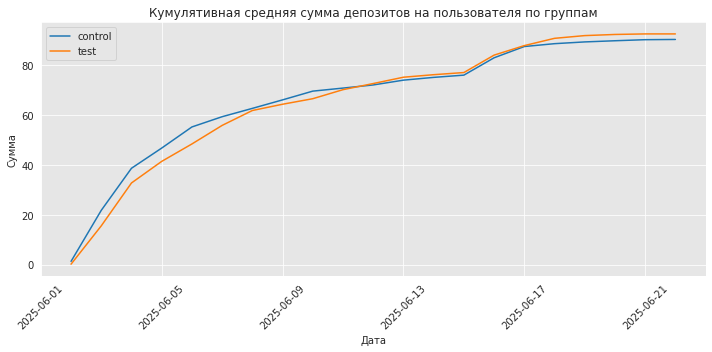

In [ ]:
plt.figure(figsize=(10, 5))

for group in mean_amount_df['group'].unique():
    plot_data = mean_amount_df[mean_amount_df['group'] == group]
    plt.plot(plot_data.date, plot_data.amount, label=group)

plt.title('Кумулятивная средняя сумма депозитов на пользователя по группам')
plt.xlabel('Дата')
plt.ylabel('Сумма')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

В течение всего эксперимента разница значений метрики в контрольной и тестовой группах оставалась почти одинаковой.

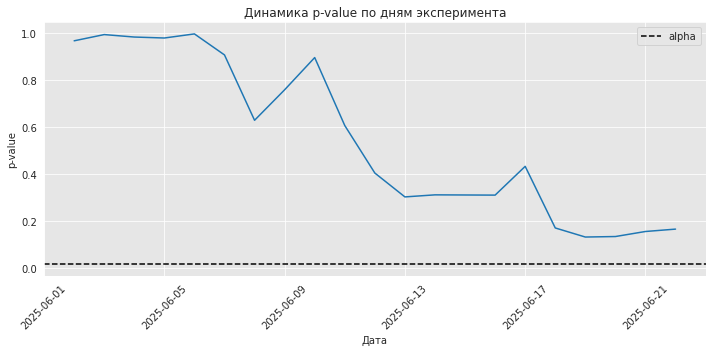

In [ ]:
pval_records = []

for current_date in sorted(abt['event_day'].unique()):

  e_to_date = abt[abt['event_day'] <= current_date]
  user_amount = e_to_date.groupby(['group', 'user_id'])['amount'].sum().reset_index()

  p_value = ttest_ind(
    user_amount[user_amount['group'] == 'control']['amount'],
    user_amount[user_amount['group'] == 'test']['amount'],
    alternative='less'
  ).pvalue

  pval_records.append({
      'date': current_date,
      'p_value': p_value
  })

pvalue_df = pd.DataFrame(pval_records)

plt.figure(figsize=(10, 5))

plt.plot(pvalue_df.date, pvalue_df.p_value)

plt.axhline(y=0.05/3, linestyle='--', color='black', label='alpha')
plt.title('Динамика p-value по дням эксперимента')
plt.xlabel('Дата')
plt.ylabel('p-value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

На протяжении всего эксперимента значение p-value постепенно приближалось к значению альфа, однако ни разу его не пересекло.

#####**Барьерная метрика — конверсия из регистрации в первый депозит**


In [ ]:
steps = ['registration', 'first_deposit',]

reg_to_dep_control = pd.DataFrame()
reg_to_dep_test = pd.DataFrame()

for group in ['control', 'test']:
  group_data = abt[abt['group'] == group]
  funnel_steps = group_data[group_data['event_name'].isin(steps)]
  funnel_counts =  funnel_steps.groupby('event_name')['user_id'].nunique().reindex(steps)

  df_name = pd.DataFrame({
    'step': steps,
    'users': funnel_counts.values
  })

  df_name['conversion_%'] = round(df_name['users'] / df_name['users'].iloc[0] * 100, 1)

  if group == 'control':
        reg_to_dep_control = df_name
  else:
        reg_to_dep_test = df_name

control_conv = reg_to_dep_control.iloc[1, 2]
test_conv = reg_to_dep_test.iloc[1, 2]

print(f'Барьерная метрика конверсия из регистрации в первый депозит:\nВ контрольной группе - {control_conv}\nВ тестовой группе - {test_conv}\nАбсолютная разница - {test_conv - control_conv}\nОтносительная разница - {round((test_conv/control_conv - 1) * 100, 2)}%')

Барьерная метрика конверсия из регистрации в первый депозит:
В контрольной группе - 71.5
В тестовой группе - 70.0
Абсолютная разница - -1.5
Относительная разница - -2.1%


Видно, что барьерная метрика упала. Проверим, значима ли эта разница.

Конверсия из регистрации в первый депозит в тестовой и контрольной группах не различается.

    H0​:pA​=pB​
    
Конверсия в группе теста ниже, чем в группе контроля.

    H1​:pA​>pB​

In [ ]:
n_a, n_b = reg_to_dep_control.iloc[0, 1], reg_to_dep_test.iloc[0, 1]
m_a, m_b = reg_to_dep_control.iloc[1, 1], reg_to_dep_test.iloc[1, 1]

stat_ztest, p_value_ztest = proportions_ztest(
      [m_a, m_b],
      [n_a, n_b],
      alternative='larger'
  )

if p_value_ztest > alpha:
      print(f'pvalue={p_value_ztest} > {alpha}')
      print(f'Уменьшение конверсии не является статистически значимым')
else:
      print(f'pvalue={p_value_ztest} < {alpha}')
      print(f'Уменьшение конверсии статистически значимо', stat_ztest)

pvalue=0.06027172404556423 > 0.05
Уменьшение конверсии не является статистически значимым


z-тест пропорций показал, что уменьшение конверсии не является статистически значимым. Можно считать, что фича не навредила продукту.

#####**Вспомогательная метрика 1 — конверсия из первого депозита во второй**


In [ ]:
control_conv = funnel_df_control.iloc[4, 4]
test_conv = funnel_df_test.iloc[4, 4]
print(f'Вспомогательная метрика конверсия из первого депозита во второй:\nВ контрольной группе - {control_conv}\nВ тестовой группе - {test_conv}\nАбсолютная разница - {round(test_conv - control_conv, 2)}\nОтносительная разница - {round((test_conv/control_conv - 1) * 100, 2)}%')

Вспомогательная метрика конверсия из первого депозита во второй:
В контрольной группе - 97.6
В тестовой группе - 88.3
Абсолютная разница - -9.3
Относительная разница - -9.53%


В тестовой группе гораздо больше конверсия из первого депозита во второй, на 60.6% больше, чем в контрольной группе. Проверим статистическую значимость этой разницы.

Конверсия из первого депозита во второй в тестовой и контрольной группах не различается.

    H0​:pA​=pB​
    
Конверсия в группе теста выше, чем в группе контроля.

    H1​:pA​>pB​

In [ ]:
n_a, n_b = funnel_df_control.iloc[3, 1], funnel_df_test.iloc[3, 1]
m_a, m_b = funnel_df_control.iloc[4, 1], funnel_df_test.iloc[4, 1]

stat_ztest, p_value_ztest = proportions_ztest(
      [m_a, m_b],
      [n_a, n_b],
      alternative='smaller'
  )

if p_value_ztest > alpha:
      print(f'pvalue={p_value_ztest} > {alpha}')
      print(f'Увеличение конверсии не является статистически значимым')
else:
      print(f'pvalue={p_value_ztest} < {alpha}')
      print(f'Увеличение конверсии статистически значимо', stat_ztest)

pvalue=1.0 > 0.05
Увеличение конверсии не является статистически значимым


Статистический тест показал значимость увеличения конверсии из первого депозита во второй в тестовй группе.

#####**Вспомогательная метрика 2 — средняя сумма всех депозитов на пользователя, который открыл хотя бы один депозит**

In [ ]:
user_amount = abt[abt['amount'] > 0].groupby(['user_id', 'group'])['amount'].sum().reset_index()
mean_amount = user_amount.groupby('group')['amount'].mean().round(2)
mean_amount = pd.DataFrame([mean_amount.values], columns=mean_amount.index)
mean_amount['abs_lift'] = mean_amount['test'] - mean_amount['control']
mean_amount['rel_lift'] = round((mean_amount['test']/mean_amount['control'] - 1) * 100, 2)
mean_amount

group,control,test,abs_lift,rel_lift
0,135.5,141.4,5.9,4.35


Средняя сумма депозитов на платящего пользователя увеличилась в тестовой группе на 4.4% процента по сравнению с контрольной. Проверим значимость этого увеличения.

H0​: Сумма депозитов на платящего пользователя в контрольной и тестовой группах не различается
    
H1​: Сумма депозитов на платящего пользователя в тестовой группе выше

In [ ]:
alpha = 0.05
p_value = ttest_ind(
    user_amount[user_amount['group'] == 'control']['amount'],
    user_amount[user_amount['group'] == 'test']['amount'],
    alternative='less'
).pvalue

if p_value > alpha:
  print('Различие не является статистически значимым')
else:
  print('Различие статистически значимо')

Различие статистически значимо


Статистический тест показывает значимость увеличения средней суммы на платящего пользователя.

- Анализ классической и step-by-step воронок показал, что тестовая группа показывает лучшую конверсию во второй депозит, однако конверсия из регистрации в онбординг лучше у контрольной группы
- Для всех уровней риска активов тестовая группа показала улучшение конверсии во второй депозит. Особенно заметен результат для высокорискованных активов - разница с контрольной группой почти 20%
- Ключевая метрика - средняя сумма всех активов на пользователя - выросла в тестовой группе на 2.5%, однако статистический тест показал, что разницу нельзя считать значимой, результат мог быть получен случайно. Либо фича не оказала существенного влияния на данную метрику, либо мощность теста была недостаточно высокой, чтобы детектировать результат.  Возможно, в более длительном тесте статистический тест показал бы значимость улучшений, тем более, что в динамике p-value в течение всего эксперимента постепенно приближался к значению alpha.
- Конверсия из регистрации в первый депозит стала на 1.5% меньше в тестовой группе, однако статистический тест показал, что результат не является статистически значимым.
- Конверсия из первого депозита во второй значительно увеличилась, что подтсвердил статистический тест
- Также статистически значимо увеличилась в тестовой группе сумма депозитов на платящего пользователя - на 4.4% по сравнению с контрольной группой

---

### 4. Анализ изменений суммы депозитов на платящего пользователя

Новая фича могла повлиять на поведение пользователей.
- Пользователи, которые раньше вносили небольшие суммы, могли стать более осторожными, сократить свои вложения или совсем перестать платить. Это отразится в снижении 25-го перцентиля суммы депозитов в тестовой группе.
- Пользователи, которые склонны к более крупным инвестициям, могли сильнее вовлечься в продукт и начать вносить больше средств. Это отразится в росте 75-го перцентиля.

Используя бутстрап, сравним разницы перцентилей (25, 50, 75) суммы всех депозитов на платящего пользователя в контрольной и тестовой группах:
- Построим доверительные интервалы для разницы между группами для каждого перцентиля.
- Интерпретируем изменения в контексте сформулированной выше гипотезы.
- Визуализируем результат бутстрап-теста.

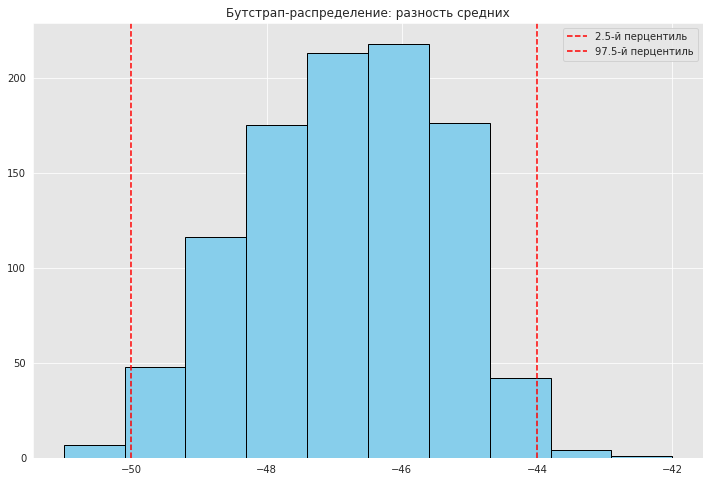

25-й перцентиль контрольной группы: 95.00
25-й перцентиль тестовой группы: 48.00
95%-й доверительный интервал разности 25-х перцентилей [-50.00, -44.00]


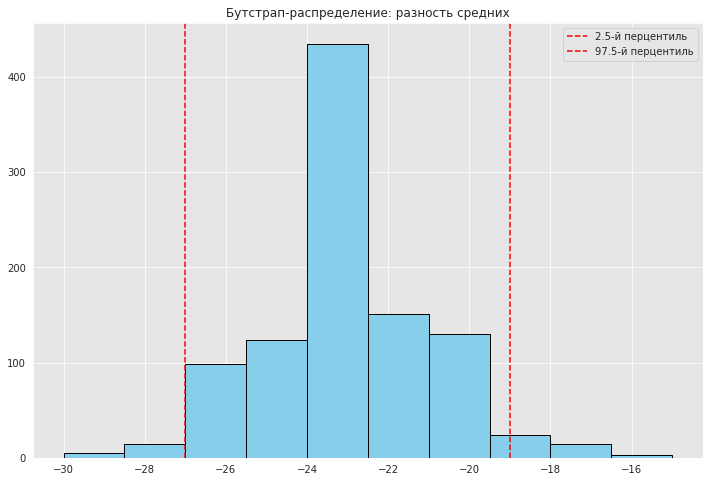

50-й перцентиль контрольной группы: 118.00
50-й перцентиль тестовой группы: 94.00
95%-й доверительный интервал разности 50-х перцентилей [-27.00, -19.00]


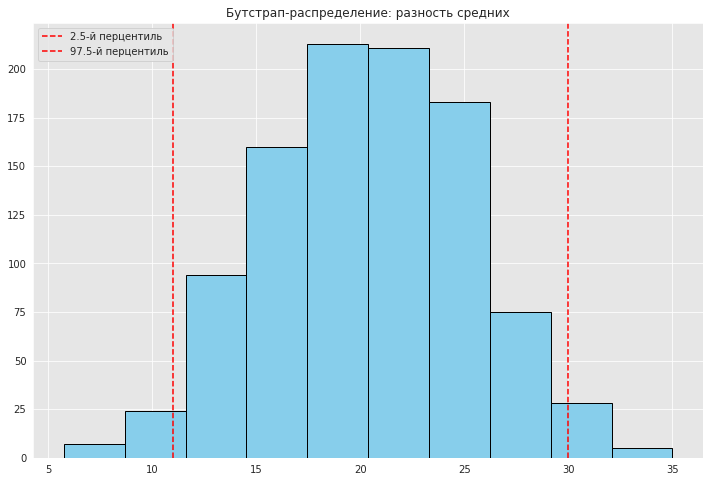

75-й перцентиль контрольной группы: 159.00
75-й перцентиль тестовой группы: 179.50
95%-й доверительный интервал разности 75-х перцентилей [11.00, 30.00]


In [ ]:
import numpy as np

results = []

for perc in [25, 50, 75]:

  np.random.seed(341)

  control = user_amount[user_amount['group'] == 'control']['amount']
  test = user_amount[user_amount['group'] == 'test']['amount']

  n_iterations = 1000
  boot_diffs = []

  for i in range(n_iterations):
      boot_control = np.random.choice(control, size=len(control), replace=True)
      boot_test = np.random.choice(test, size=len(test), replace=True)

      control_p = np.percentile(boot_control, perc)
      test_p = np.percentile(boot_test, perc)

      boot_diffs.append(test_p - control_p)

  boot_diffs = np.array(boot_diffs)

  diff_ci = np.percentile(boot_diffs, [2.5, 97.5])

  results.append({
        'percentile': perc,
        'control_value': np.percentile(control, perc),
        'test_value': np.percentile(test, perc),
        'boot_diffs': boot_diffs,
        'ci_lower': diff_ci[0],
        'ci_upper': diff_ci[1]
    })

  plt.figure(figsize=(12, 8))

  plt.hist(boot_diffs, color='skyblue', edgecolor='black')
  plt.axvline(diff_ci[0], color='red', linestyle='--', label='2.5-й перцентиль')
  plt.axvline(diff_ci[1], color='red', linestyle='--', label='97.5-й перцентиль')
  plt.title("Бутстрап-распределение: разность средних")
  plt.legend()
  plt.show()

  print(f"{perc}-й перцентиль контрольной группы: {np.percentile(control, perc):.2f}")
  print(f"{perc}-й перцентиль тестовой группы: {np.percentile(test, perc):.2f}")
  print(f"95%-й доверительный интервал разности {perc}-х перцентилей [{diff_ci[0]:.2f}, {diff_ci[1]:.2f}]")

Ни один из доверительных интервалов не пересекает 0, соответственно, все разницы статистически значимы.

Значения 25-ого перцентиля и медианы в тестовой группе ниже, чем в контрольной, а 75-ого, наоборот, выше.

Можно предположить, что тех из пользователей, кто и так склонен не рисковать и не вносить слишком много денег на депозиты, подробная информация о высокорискованных активах еще больше отпугнула, они стали вкладывать еще меньше, чем раньше. И наоборот, тех, кто был готов на риски, подробный разбор сделок с высоким риском дополнительно подстегнул покупать более дорогостоящие активы и привлек. Влияние, оказанное на пользователей, которые не готовы рисковать и вкладывать много денег (стоимость актива, как правило, напрямую зависит от уровня его рискованности), перевесило, поэтому медиана тестовой группы, то есть общий сдвиг, так же оказалась ниже, чем в контрольной.

---

### 5. Выводы

**Исторические данные**

- Меньше всего пользователей привлекается из Аргентины. Возможно, стоит пересмотреть маркетинговую стратегию в данном регионе.

- Также веб-версия приложения не пользуется популярностью (более чем в два раза меньше пользователей). Стоит проверить достаточно ли она удобна, нет ли перспективы улучшить ее, чтобы привлечь больше пользователей, которым может быть удобнее пользоваться компьютером, а не смартфоном.

- Наибольшие потери пользователей происходят на этапе второго депозита. На этом шаге отсеивается 29.9% всех пользователей или 45.3% тех, кто купил актив.

- Наименьшая конверсия во второй депозит среди пользователей, которые приобретают первый актив высокого уровня риска. Судя по всему такие пользователи часто теряли деньги, что и отпугивало их продолжать пользоваться приложением.

- До проведения теста наибольшее количество пользователей вносили на депозиты суммарно 90-140. Среднее значения на пользователя c учетом всех пользователей составляло 88.47. Стандартное отклонение 79.64 показывает довольно большой разброс значений в данных.


**Тест**

- Тест проводился на 7 дней дольше, чем планировалось. Данные собирались корректно. В тестовую группу попало 4568 пользователей, в контрольную - 4847, что немного превосходит тестовую группу количественно, однако в связи с тем, что качественный состав у групп идентичен, эта разница не является критической.
- Анализ классической и step-by-step воронок показал, что тестовая группа показывает лучшую конверсию во второй депозит, однако конверсия из регистрации в онбординг лучше у контрольной группы
- Для всех уровней риска активов тестовая группа показала улучшение конверсии во второй депозит. Особенно заметен результат для высокорискованных активов - разница с контрольной группой почти 20%
- Ключевая метрика - средняя сумма всех активов на пользователя - выросла в тестовой группе на 2.5%, однако статистический тест показал, что разницу нельзя считать значимой, результат мог быть получен случайно. Либо фича не оказала существенного влияния на данную метрику, либо мощность теста была недостаточно высокой, чтобы детектировать результат.  Возможно, в более длительном тесте статистический тест показал бы значимость улучшений, тем более, что в динамике p-value в течение всего эксперимента постепенно приближался к значению alpha.
- Конверсия из регистрации в первый депозит стала на 1.5% меньше в тестовой группе, однако статистический тест показал, что результат не является статистически значимым.
- Конверсия из первого депозита во второй значительно увеличилась, что подтсвердил статистический тест
- Также статистически значимо увеличилась в тестовой группе сумма депозитов на платящего пользователя - на 4.4% по сравнению с контрольной группой
- Бутстрап-тест показал, что фича негативно влияет на 25-ый перцентиль пользователей, их опасения перед риском, судя по всему, только растут от более подробной информации о высокорискованных активах, поэтому они вкладывают меньше, чем та же категория пользователей до теста. Для 75-ого перцентиля ситуация обратная: их фича стимулировала вкладываться еще больше, так как им стало понятнее, как работают интересующие их активы высокого уровня риска.

**Выводы и рекомендации**

Гипотеза гласила, что фича увеличит среднюю сумму всех депозитов на пользователя, но статистически эта гипотеза не подтвердилась. Однако фича статистически значимо положительно повлияла на вспомогательные метрики, а по ключевой показала перспективную динамику: возможно, при большем объеме данных результат был бы зафиксирован.

Можно продлить тест, увеличив тем самым его мощность, понаблюдать динамику дольше. Это позволит проявиться положительному эффекту на клучевую метрику, если он есть. При этом нужно особенно внимательно наблюдать за барьерной метрикой, так как к ней так же применимо предположение о недостаточной мощности для детектирования эффекта. Есть вероятность, что именно пользователи, которые мало склонны вносить большие депозиты и рисковать, влияют на барьерную метрику: часть из них акцент на высокорискованных активах отпугивает и пользователи отказываются регистрироваться, а те, кто всё-таки зарегистрировался действуют гораздо осторожнее и вносят на депозиты меньше.

Второй вариант - доработать фичу. Сделать информацию более подробной для всех уровней риска, чтобы сохранялся баланс и не было такого явного акцента на высоком, что может выглядеть для пользователя как агрессивное навязывание и отталкивать. После доработки перезапустить тест и провести анализ повторно.